In [83]:
import pandas as pd
import numpy as np


file_path = "ICT 511 GROUP 1 PROJECT .xlsx"
xls = pd.ExcelFile(file_path)

all_days_data = []

for sheet_name in xls.sheet_names:
    df_raw = pd.read_excel(file_path, sheet_name=sheet_name)

    arrival_cols = [col for col in df_raw.columns if "ARRIVAL TIME" in str(col).upper()]
    df_arrivals = df_raw[arrival_cols]


    arrival_times = df_arrivals.values.flatten()
    arrival_times = pd.Series(arrival_times).dropna()


    arrival_times = pd.to_datetime(arrival_times, errors="coerce").dropna()

    # Convert to seconds from 8:00 AM
    base_time = pd.to_datetime("08:00:00", format="%H:%M:%S")
    seconds_from_8am = (
        arrival_times.dt.hour * 3600
        + arrival_times.dt.minute * 60
        + arrival_times.dt.second
    ) - (8 * 3600)

    # Keep only arrivals between 8:00–10:00 (0–7200 seconds)
    seconds_from_8am = seconds_from_8am[
        (seconds_from_8am >= 0) & (seconds_from_8am <= 7200)
    ]

    # Count arrivals per minute
    arrivals_per_min = seconds_from_8am // 60
    minute_counts = pd.Series(arrivals_per_min).value_counts().sort_index()

    # Build DataFrame (120 minutes = 8:00–10:00)
    day_data = pd.DataFrame({
        "Minute": range(0, 121),
        "Arrivals": [minute_counts.get(m, 0) for m in range(0, 121)]
    })

    # Tag with day/week info
    day_data["Sheet"] = sheet_name
    all_days_data.append(day_data)


full_data = pd.concat(all_days_data, ignore_index=True)

# Preview
print(full_data.tail(20))
print("\nShape of full dataset:", full_data.shape)
print(f"\n=== Preview of {sheet_name} ===")
print(df_arrivals.head(10))
print(df_raw.columns.tolist())



     Minute  Arrivals          Sheet
706     101         0  WEEK 3 SHEET 
707     102         0  WEEK 3 SHEET 
708     103         0  WEEK 3 SHEET 
709     104         0  WEEK 3 SHEET 
710     105         0  WEEK 3 SHEET 
711     106         0  WEEK 3 SHEET 
712     107         0  WEEK 3 SHEET 
713     108         0  WEEK 3 SHEET 
714     109         0  WEEK 3 SHEET 
715     110         0  WEEK 3 SHEET 
716     111         0  WEEK 3 SHEET 
717     112         0  WEEK 3 SHEET 
718     113         0  WEEK 3 SHEET 
719     114         0  WEEK 3 SHEET 
720     115         0  WEEK 3 SHEET 
721     116         0  WEEK 3 SHEET 
722     117         0  WEEK 3 SHEET 
723     118         0  WEEK 3 SHEET 
724     119         0  WEEK 3 SHEET 
725     120         0  WEEK 3 SHEET 

Shape of full dataset: (726, 3)

=== Preview of WEEK 3 SHEET  ===
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['DATA FOR WEEK 3', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 

In [84]:
import pandas as pd
import numpy as np

file_path = "ICT 511 GROUP 1 PROJECT .xlsx"
df_raw = pd.read_excel(file_path, header=None)

print(df_raw.head(15))


                    0             1                2   3         4   \
0     DATA FOR WEEK 1            NaN              NaN NaN       NaN   
1   WEDNESDAY 19/03/25           NaN            DAY 1 NaN  TEMITOPE   
2                BUS 1           NaN              NaN NaN     BUS 2   
3              STUDENT  ARRIVAL TIME  CHANGE IN TIME  NaN   STUDENT   
4                    1      08:02:02                0 NaN         1   
5                    2      08:02:06                4 NaN         2   
6                    3      08:02:10                4 NaN         3   
7                    4      08:02:10                0 NaN         4   
8                    5      08:02:18                8 NaN         5   
9                    6      08:02:22                4 NaN         6   
10                   7      08:02:30                5 NaN         7   
11                   8      08:02:36                6 NaN         8   
12                   9      08:02:43                7 NaN         9   
13    

In [85]:
import pandas as pd
import numpy as np

file_path = "ICT 511 GROUP 1 PROJECT .xlsx"

def extract_arrivals(sheet_name):
    # Read sheet without headers
    df_raw = pd.read_excel(file_path, sheet_name=sheet_name, header=None)


    df_data = df_raw.iloc[4:, :]


    arrival_cols = df_data.columns[1::3]


    arrival_times = df_data[arrival_cols].values.flatten()
    arrival_times = pd.Series(arrival_times).dropna()

    # Convert to datetime
    arrival_times = pd.to_datetime(arrival_times, format="%H:%M:%S", errors="coerce").dropna()

    # Convert to seconds since 8:00 AM
    base_time = pd.to_datetime("08:00:00", format="%H:%M:%S")
    seconds_from_8am = (
        arrival_times.dt.hour * 3600
        + arrival_times.dt.minute * 60
        + arrival_times.dt.second
    ) - (8 * 3600)

    # Keep only 0–7200 seconds (8:00–10:00)
    seconds_from_8am = seconds_from_8am[
        (seconds_from_8am >= 0) & (seconds_from_8am <= 7200)
    ]

    # Count arrivals per minute
    arrivals_per_min = seconds_from_8am // 60
    minute_counts = pd.Series(arrivals_per_min).value_counts().sort_index()


    day_data = pd.DataFrame({
        "Minute": range(0, 121),
        "Arrivals": [minute_counts.get(m, 0) for m in range(0, 121)]
    })
    day_data["Sheet"] = sheet_name

    return day_data



all_data = []
for sheet in ['WEEK 1 SHEET ', 'WEEK 2 SHEET ', 'WEEK 3 SHEET ']:
    all_data.append(extract_arrivals(sheet))

full_data = pd.concat(all_data, ignore_index=True)

print(full_data.head(20))
print("\nShape:", full_data.shape)


    Minute  Arrivals          Sheet
0        0        21  WEEK 1 SHEET 
1        1        20  WEEK 1 SHEET 
2        2        22  WEEK 1 SHEET 
3        3         8  WEEK 1 SHEET 
4        4         0  WEEK 1 SHEET 
5        5         9  WEEK 1 SHEET 
6        6        13  WEEK 1 SHEET 
7        7        10  WEEK 1 SHEET 
8        8        20  WEEK 1 SHEET 
9        9        19  WEEK 1 SHEET 
10      10        13  WEEK 1 SHEET 
11      11        21  WEEK 1 SHEET 
12      12        32  WEEK 1 SHEET 
13      13        12  WEEK 1 SHEET 
14      14        16  WEEK 1 SHEET 
15      15        19  WEEK 1 SHEET 
16      16        10  WEEK 1 SHEET 
17      17        18  WEEK 1 SHEET 
18      18        15  WEEK 1 SHEET 
19      19         7  WEEK 1 SHEET 

Shape: (363, 3)


In [86]:
import pandas as pd

file_path = "ICT 511 GROUP 1 PROJECT .xlsx"
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)


['DO NOT TOUCH🚨🚨', 'WEEK 1 SHEET ', 'WEEK 2 SHEET ', 'INTERVALS', 'COLLATION SHEET', 'WEEK 3 SHEET ']


In [87]:
import pandas as pd

file_path = '/content/ICT 511 GROUP 1 PROJECT - collation sheet.xlsx'
df_sample = pd.read_excel(file_path, sheet_name="Collation sheet 1", usecols=[0,1,2])

print(df_sample.head(20))
print("\nColumn types:")
print(df_sample.dtypes)


     WEEK 1    Unnamed: 1       Unnamed: 2
0   STUDENT  ARRIVAL TIME  CHANGE IN TIME 
1         1      08:02:02                0
2         2      08:02:06                4
3         3      08:02:10                4
4         4      08:02:10                0
5         5      08:02:18                8
6         6      08:02:22                4
7         7      08:02:30                5
8         8      08:02:36                6
9         9      08:02:43                7
10       10      08:02:56               13
11       11      08:03:00                4
12       12      08:03:05                5
13       13      08:03:11                6
14       14      08:03:15                5
15       15      08:03:15                0
16       16      08:03:15                0
17       17      08:03:18                3
18       18      08:03:27                9
19        1      08:03:27                0

Column types:
WEEK 1        object
Unnamed: 1    object
Unnamed: 2    object
dtype: object


In [88]:
import pandas as pd

file_path = '/content/ICT 511 GROUP 1 PROJECT - collation sheet.xlsx'

def extract_week(sheet_name):

    df_raw = pd.read_excel(file_path, sheet_name=sheet_name, header=1, usecols=[0,1,2])
    df_raw.columns = ["Student", "ArrivalTime", "ChangeInTime"]


    df_raw["ArrivalTime"] = pd.to_datetime(df_raw["ArrivalTime"], format="%H:%M:%S", errors="coerce")


    df_raw["SecondsFrom8"] = (
        df_raw["ArrivalTime"].dt.hour * 3600 +
        df_raw["ArrivalTime"].dt.minute * 60 +
        df_raw["ArrivalTime"].dt.second
    ) - (8 * 3600)


    n = len(df_raw)
    rows_per_day = n // 5
    df_raw["Day"] = (df_raw.index // rows_per_day) + 1
    df_raw.loc[df_raw["Day"] > 5, "Day"] = 5

    # Count arrivals per minute per day
    all_days = []
    for d in sorted(df_raw["Day"].unique()):
        day_times = df_raw.loc[df_raw["Day"] == d, "SecondsFrom8"].dropna()
        arrivals_per_min = (day_times // 60).astype(int)
        minute_counts = arrivals_per_min.value_counts().sort_index()

        day_data = pd.DataFrame({
            "Minute": range(0, 121),
            "Arrivals": [minute_counts.get(m, 0) for m in range(0, 121)]
        })
        day_data["Day"] = d
        day_data["SheetName"] = sheet_name
        all_days.append(day_data)

    return pd.concat(all_days, ignore_index=True)


# Example: process all 3 weeks
week1 = extract_week("Collation sheet 1")
week2 = extract_week("Collation sheet 2")
week3 = extract_week("Collation sheet 3")

full_data = pd.concat([week1, week2, week3], ignore_index=True)

print(full_data.tail(20))
print("\nUnique Sheet Names:", full_data["SheetName"].unique())


      Minute  Arrivals  Day          SheetName
1795     101         7    5  Collation sheet 3
1796     102         7    5  Collation sheet 3
1797     103         8    5  Collation sheet 3
1798     104         7    5  Collation sheet 3
1799     105         7    5  Collation sheet 3
1800     106         8    5  Collation sheet 3
1801     107         6    5  Collation sheet 3
1802     108         8    5  Collation sheet 3
1803     109         7    5  Collation sheet 3
1804     110         8    5  Collation sheet 3
1805     111         7    5  Collation sheet 3
1806     112         6    5  Collation sheet 3
1807     113         7    5  Collation sheet 3
1808     114         8    5  Collation sheet 3
1809     115         8    5  Collation sheet 3
1810     116         7    5  Collation sheet 3
1811     117         8    5  Collation sheet 3
1812     118         7    5  Collation sheet 3
1813     119         3    5  Collation sheet 3
1814     120         0    5  Collation sheet 3

Unique Sheet

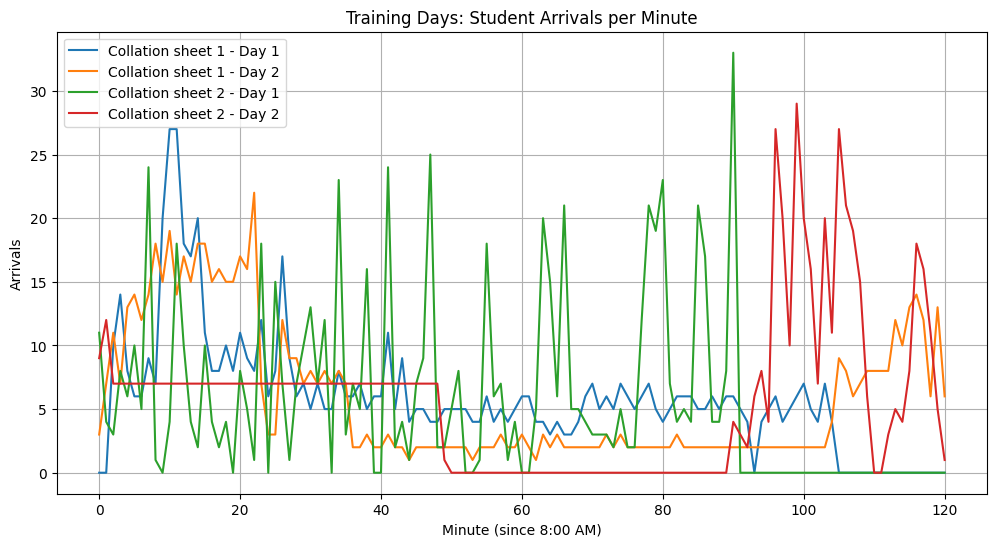

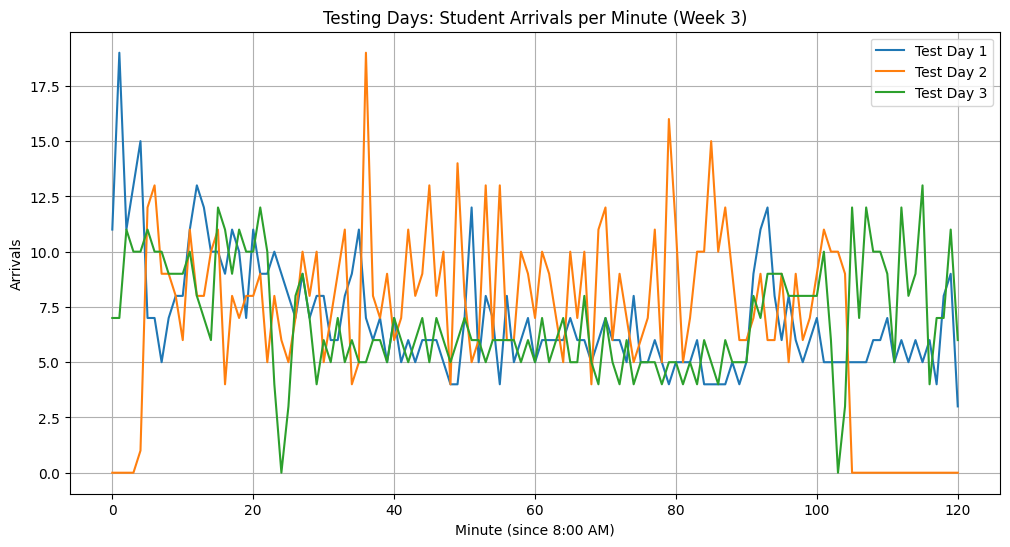

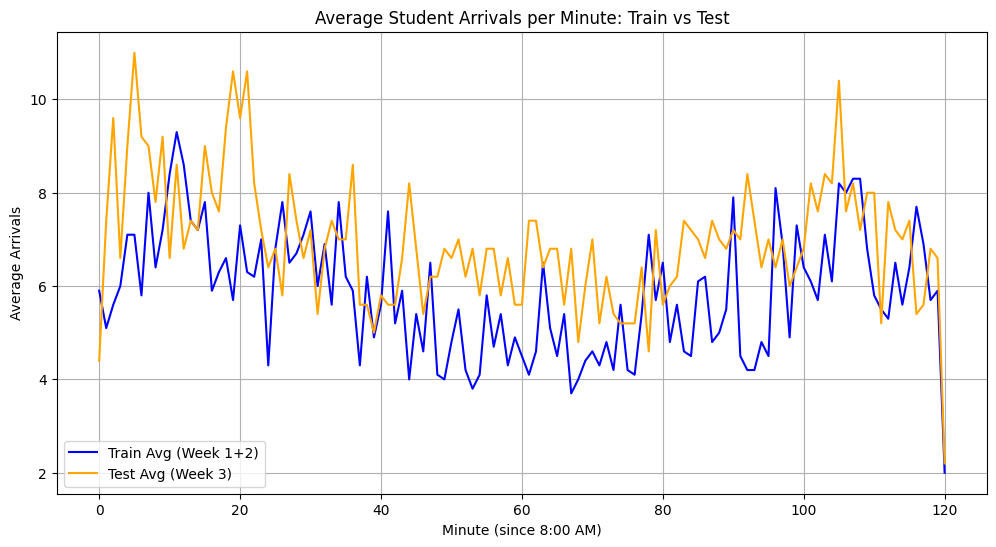

📊 Train Summary (first 10 minutes):
         mean    std
Minute              
0      5.9000 5.3635
1      5.1000 4.4083
2      5.6000 3.4383
3      6.0000 3.7417
4      7.1000 4.0675
5      7.1000 3.9847
6      5.8000 3.2931
7      8.0000 6.8313
8      6.4000 5.1251
9      7.2000 6.2503

📊 Test Summary (first 10 minutes):
          mean    std
Minute               
0       4.4000 4.7223
1       7.4000 8.0187
2       9.6000 7.8613
3       6.6000 5.7706
4       9.0000 5.1478
5      11.0000 5.7879
6       9.2000 2.4900
7       9.0000 2.9155
8       7.8000 1.3038
9       9.2000 2.1679

Peak Train Minute: 11 with 9.3 students/min
Peak Test Minute: 5 with 11.0 students/min


In [89]:
import matplotlib.pyplot as plt


train = full_data[full_data["SheetName"].isin(["Collation sheet 1", "Collation sheet 2"])]
test  = full_data[full_data["SheetName"] == "Collation sheet 3"]

#  1. Plot sample training days
plt.figure(figsize=(12,6))
for sheet in train["SheetName"].unique():
    for d in train[train["SheetName"] == sheet]["Day"].unique()[:2]:
        day_data = train[(train["SheetName"] == sheet) & (train["Day"] == d)]
        plt.plot(day_data["Minute"], day_data["Arrivals"], label=f"{sheet} - Day {d}")
plt.xlabel("Minute (since 8:00 AM)")
plt.ylabel("Arrivals")
plt.title("Training Days: Student Arrivals per Minute")
plt.legend()
plt.grid(True)
plt.show()

#  2. Plot sample testing days (Week 3)
plt.figure(figsize=(12,6))
for d in test["Day"].unique()[:3]:
    day_data = test[test["Day"] == d]
    plt.plot(day_data["Minute"], day_data["Arrivals"], label=f"Test Day {d}")
plt.xlabel("Minute (since 8:00 AM)")
plt.ylabel("Arrivals")
plt.title("Testing Days: Student Arrivals per Minute (Week 3)")
plt.legend()
plt.grid(True)
plt.show()

#  3. Compare average arrivals (Train vs Test)
avg_train = train.groupby("Minute")["Arrivals"].mean()
avg_test  = test.groupby("Minute")["Arrivals"].mean()

plt.figure(figsize=(12,6))
plt.plot(avg_train.index, avg_train.values, label="Train Avg (Week 1+2)", color="blue")
plt.plot(avg_test.index, avg_test.values, label="Test Avg (Week 3)", color="orange")
plt.xlabel("Minute (since 8:00 AM)")
plt.ylabel("Average Arrivals")
plt.title("Average Student Arrivals per Minute: Train vs Test")
plt.legend()
plt.grid(True)
plt.show()

#  4. Summary Statistics
train_summary = train.groupby("Minute")["Arrivals"].agg(["mean", "std"])
test_summary  = test.groupby("Minute")["Arrivals"].agg(["mean", "std"])

print("📊 Train Summary (first 10 minutes):")
print(train_summary.head(10))

print("\n📊 Test Summary (first 10 minutes):")
print(test_summary.head(10))

print("\nPeak Train Minute:", train_summary["mean"].idxmax(),
      "with", train_summary["mean"].max(), "students/min")
print("Peak Test Minute:", test_summary["mean"].idxmax(),
      "with", test_summary["mean"].max(), "students/min")


In [90]:
import numpy as np
import pandas as pd

def build_feature_table(df):
    df_feat = df.copy()

    # t = Minute index
    df_feat["t"] = df_feat["Minute"]

    # Cyclical encoding of time
    df_feat["sin_time"] = np.sin(2 * np.pi * df_feat["Minute"] / 120)
    df_feat["cos_time"] = np.cos(2 * np.pi * df_feat["Minute"] / 120)


    group_cols = ["SheetName", "Day"]

    # Lag feature: previous minute arrivals
    df_feat["y_(t-1)"] = df_feat.groupby(group_cols)["Arrivals"].shift(1)

    # Rolling 5-min average (per day within each sheet, excluding current minute)
    df_feat["5-min avg"] = (
        df_feat.groupby(group_cols)["Arrivals"]
        .shift(1)
        .rolling(window=5, min_periods=1)
        .mean()
        .reset_index(drop=True)
    )

    # Encode weekday using Day index
    weekday_map = {0:"Wednesday", 1:"Thursday", 2:"Friday", 3:"Monday", 4:"Tuesday"}
    df_feat["Weekday"] = (df_feat["Day"] - 1) % 5
    df_feat = pd.get_dummies(df_feat, columns=["Weekday"])

    # Rename dummy columns properly
    df_feat.rename(columns={f"Weekday_{i}": weekday_map[i] for i in range(5)}, inplace=True)

    # Ensure one-hot columns exist (fill missing with 0)
    for col in ["Wednesday", "Thursday", "Friday", "Monday", "Tuesday"]:
        if col not in df_feat:
            df_feat[col] = 0
        df_feat[col] = df_feat[col].astype(int)

    # Target variable
    df_feat["y (target)"] = df_feat["Arrivals"]

    # Final feature table
    feature_table = df_feat[[
        "SheetName", "Day", "t", "sin_time", "cos_time", "y_(t-1)", "5-min avg",
        "Wednesday", "Thursday", "Friday", "Monday", "Tuesday",
        "y (target)"
    ]]

    return feature_table


# Apply to dataset
feature_table = build_feature_table(full_data)

print(feature_table.head(15))
print(feature_table.tail(15))

trasformed_table = feature_table.to_csv("transformed_table.csv", index=False)

            SheetName  Day   t  sin_time  cos_time  y_(t-1)  5-min avg  \
0   Collation sheet 1    1   0    0.0000    1.0000      NaN        NaN   
1   Collation sheet 1    1   1    0.0523    0.9986   0.0000     0.0000   
2   Collation sheet 1    1   2    0.1045    0.9945   0.0000     0.0000   
3   Collation sheet 1    1   3    0.1564    0.9877  10.0000     3.3333   
4   Collation sheet 1    1   4    0.2079    0.9781  14.0000     6.0000   
5   Collation sheet 1    1   5    0.2588    0.9659   8.0000     6.4000   
6   Collation sheet 1    1   6    0.3090    0.9511   6.0000     7.6000   
7   Collation sheet 1    1   7    0.3584    0.9336   6.0000     8.8000   
8   Collation sheet 1    1   8    0.4067    0.9135   9.0000     8.6000   
9   Collation sheet 1    1   9    0.4540    0.8910   7.0000     7.2000   
10  Collation sheet 1    1  10    0.5000    0.8660  20.0000     9.6000   
11  Collation sheet 1    1  11    0.5446    0.8387  27.0000    13.8000   
12  Collation sheet 1    1  12    0.58

In [91]:
import pandas as pd


train_df = feature_table[feature_table["SheetName"].isin(["Collation sheet 1", "Collation sheet 2"])].copy()
test_df  = feature_table[feature_table["SheetName"] == "Collation sheet 3"].copy()


X_train = train_df.drop(columns=["y (target)", "SheetName", "Day"])
y_train = train_df["y (target)"]

X_test = test_df.drop(columns=["y (target)", "SheetName", "Day"])
y_test = test_df["y (target)"]

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train sheets:", train_df["SheetName"].unique())
print("Test sheets:", test_df["SheetName"].unique())


Train shape: (1210, 10) Test shape: (605, 10)
Train sheets: ['Collation sheet 1' 'Collation sheet 2']
Test sheets: ['Collation sheet 3']


In [92]:
test_df

,SheetName,Day,t,sin_time,cos_time,y_(t-1),5-min avg,Wednesday,Thursday,Friday,Monday,Tuesday,y (target)
1210,Collation sheet 3,1,0,0.0000,1.0000,NaN,12.5000,1,0,0,0,0,11
1211,Collation sheet 3,1,1,0.0523,0.9986,11.0000,11.7500,1,0,0,0,0,19
1212,Collation sheet 3,1,2,0.1045,0.9945,19.0000,14.2500,1,0,0,0,0,11
1213,Collation sheet 3,1,3,0.1564,0.9877,11.0000,14.2500,1,0,0,0,0,13
1214,Collation sheet 3,1,4,0.2079,0.9781,13.0000,13.5000,1,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,Collation sheet 3,5,116,-0.2079,0.9781,8.0000,7.2000,0,0,0,0,1,7
1811,Collation sheet 3,5,117,-0.1564,0.9877,7.0000,7.2000,0,0,0,0,1,8
1812,Collation sheet 3,5,118,-0.1045,0.9945,8.0000,7.6000,0,0,0,0,1,7
1813,Collation sheet 3,5,119,-0.0523,0.9986,7.0000,7.6000,0,0,0,0,1,3


In [93]:
'''import pandas as pd

# Split into train (Days 1–10) and test (Days 11–15)
train_df = feature_table[feature_table["AbsDay"] <= 10].copy()
test_df  = feature_table[feature_table["AbsDay"] > 10].copy()

# Define predictors and target
X_train = train_df.drop(columns=["y (target)", "AbsDay"])
y_train = train_df["y (target)"]

X_test = test_df.drop(columns=["y (target)", "AbsDay"])
y_test = test_df["y (target)"]

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train days:", train_df["AbsDay"].unique())
print("Test days:", test_df["AbsDay"].unique())'''


'import pandas as pd\n\n# Split into train (Days 1–10) and test (Days 11–15)\ntrain_df = feature_table[feature_table["AbsDay"] <= 10].copy()\ntest_df  = feature_table[feature_table["AbsDay"] > 10].copy()\n\n# Define predictors and target\nX_train = train_df.drop(columns=["y (target)", "AbsDay"])\ny_train = train_df["y (target)"]\n\nX_test = test_df.drop(columns=["y (target)", "AbsDay"])\ny_test = test_df["y (target)"]\n\nprint("Train shape:", X_train.shape, "Test shape:", X_test.shape)\nprint("Train days:", train_df["AbsDay"].unique())\nprint("Test days:", test_df["AbsDay"].unique())'

In [94]:
train_df.tail()

,SheetName,Day,t,sin_time,cos_time,y_(t-1),5-min avg,Wednesday,Thursday,Friday,Monday,Tuesday,y (target)
1205,Collation sheet 2,5,116,-0.2079,0.9781,12.0000,13.4000,0,0,0,0,1,14
1206,Collation sheet 2,5,117,-0.1564,0.9877,14.0000,13.2000,0,0,0,0,1,9
1207,Collation sheet 2,5,118,-0.1045,0.9945,9.0000,12.2000,0,0,0,0,1,11
1208,Collation sheet 2,5,119,-0.0523,0.9986,11.0000,11.6000,0,0,0,0,1,16
1209,Collation sheet 2,5,120,-0.0000,1.0000,16.0000,12.4000,0,0,0,0,1,7


In [95]:
y_test.head(15)

,y (target)
1210,11
1211,19
1212,11
1213,13
1214,15
1215,7
1216,7
1217,5
1218,7
1219,8


📊 Train Results
   MSE:  11.5327
   RMSE: 3.3960
   R²:   0.4922

📊 Test Results
   MSE:  8.0668
   RMSE: 2.8402
   R²:   0.3204



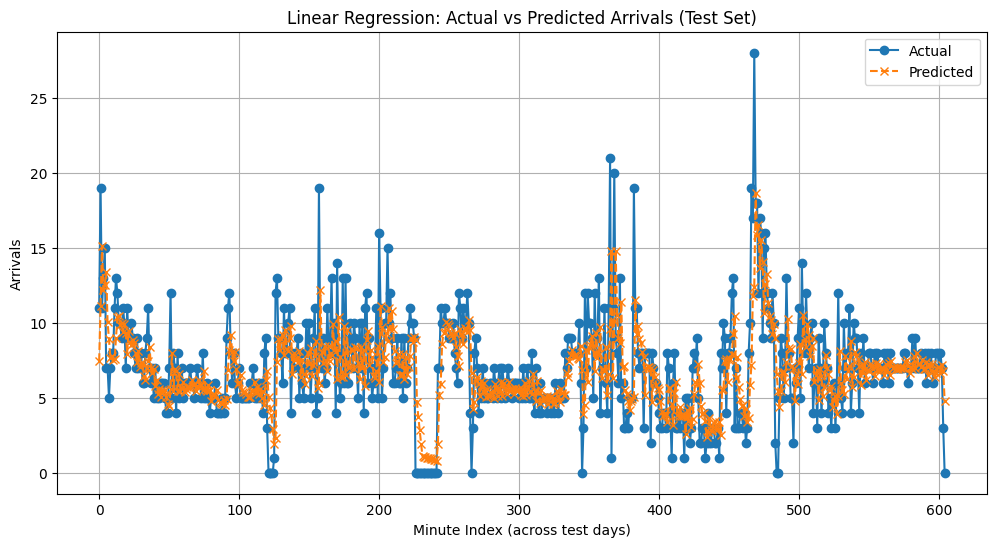

In [96]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Replace NaNs in lag/rolling features with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred  = lin_reg.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"📊 {dataset_name} Results")
    print(f"   MSE:  {mse:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   R²:   {r2:.4f}\n")

evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")

# Plot Actual vs Predicted for Test Set
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", marker="o", linestyle="-")
plt.plot(y_test_pred, label="Predicted", marker="x", linestyle="--")
plt.title("Linear Regression: Actual vs Predicted Arrivals (Test Set)")
plt.xlabel("Minute Index (across test days)")
plt.ylabel("Arrivals")
plt.legend()
plt.grid(True)
plt.show()


Train (BGD) -> MSE: 45.7098, RMSE: 6.7609, R2 : -1.0128
Test  (BGD) -> MSE: 44.5081, RMSE: 6.6714, R2 : -2.7494


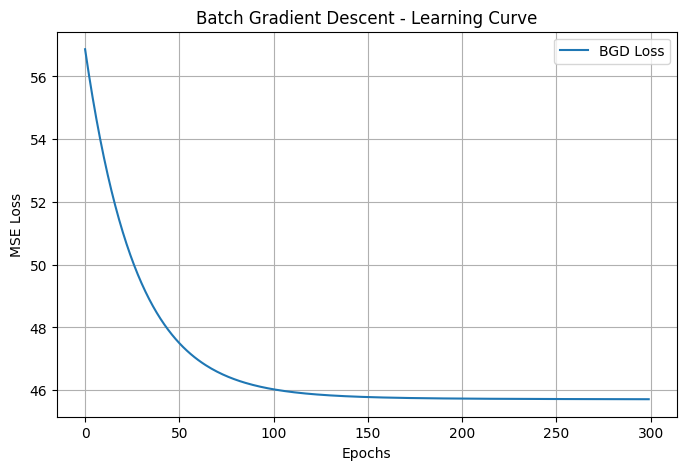

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#  Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_array = y_train.values.reshape(-1,1)
y_test_array  = y_test.values.reshape(-1,1)

# Batch Gradient Descent Implementation
def batch_gradient_descent(X, y, lr=0.01, epochs=300, tol=1e-6):
    n_samples, n_features = X.shape
    theta = np.zeros((n_features,1))
    losses = []

    for epoch in range(epochs):
        # Predictions
        y_pred = X.dot(theta)

        # Gradient
        gradient = (1/n_samples) * X.T.dot(y_pred - y)

        # Update
        theta = theta - lr * gradient

        # Compute loss (MSE)
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)

        # Early stopping if improvement is tiny
        if epoch > 10 and abs(losses[-2] - losses[-1]) < tol:
            print(f"Stopping early at epoch {epoch}")
            break

    return theta, losses

#  Train model
theta_bgd, losses_bgd = batch_gradient_descent(X_train_scaled, y_train_array, lr=0.01, epochs=300)

#  Predictions
y_train_pred_bgd = X_train_scaled.dot(theta_bgd)
y_test_pred_bgd  = X_test_scaled.dot(theta_bgd)

# Evaluation
def evaluate(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2 : {r2:.4f}")
    return mse, rmse, r2

evaluate(y_train_array, y_train_pred_bgd, "Train (BGD)")
evaluate(y_test_array, y_test_pred_bgd, "Test  (BGD)")

#  Learning curve
plt.figure(figsize=(8,5))
plt.plot(losses_bgd, label="BGD Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Batch Gradient Descent - Learning Curve")
plt.legend()
plt.grid(True)
plt.show()



 Training with learning rate = 0.0001

 Training with learning rate = 0.001

 Training with learning rate = 0.01


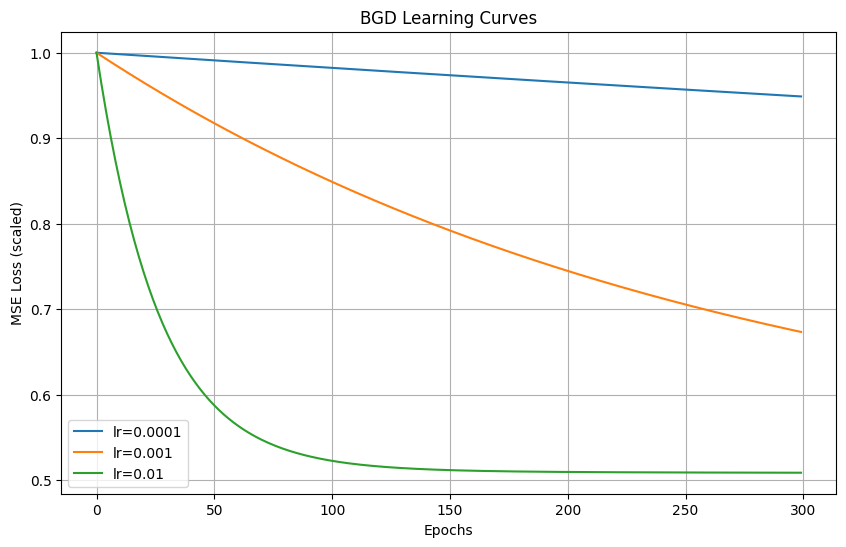


📊 Results Summary (BGD)
    LR  Train MSE  Train RMSE  Train R²  Test MSE  Test RMSE  Test R²
0.0001    21.5444      4.6416    0.0513   12.5194     3.5383  -0.0546
0.0010    15.2771      3.9086    0.3273    9.4825     3.0794   0.2012
0.0100    11.5501      3.3985    0.4914    8.0863     2.8436   0.3188


In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Normalize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Normalize target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled  = scaler_y.transform(y_test.values.reshape(-1,1))

# Batch Gradient Descent Implementation
def batch_gradient_descent(X, y, lr=0.01, epochs=300, tol=1e-6):
    n_samples, n_features = X.shape
    theta = np.zeros((n_features,1))
    losses = []

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        gradient = (1/n_samples) * X.T.dot(y_pred - y)
        theta = theta - lr * gradient

        # Compute loss in scaled space
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)

        if epoch > 10 and abs(losses[-2] - losses[-1]) < tol:
            break

    return theta, losses

# Evaluation functio
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# Run BGD for multiple learning rates
results_bgd = {}
plt.figure(figsize=(10,6))

for lr in [0.0001, 0.001, 0.01]:
    print(f"\n Training with learning rate = {lr}")
    theta, losses = batch_gradient_descent(X_train_scaled, y_train_scaled, lr=lr, epochs=300)

    # Predictions (rescale back to original arrivals)
    y_train_pred_scaled = X_train_scaled.dot(theta)
    y_test_pred_scaled  = X_test_scaled.dot(theta)

    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
    y_test_pred  = scaler_y.inverse_transform(y_test_pred_scaled)

    train_metrics = evaluate(y_train.values.reshape(-1,1), y_train_pred)
    test_metrics  = evaluate(y_test.values.reshape(-1,1), y_test_pred)

    results_bgd[lr] = {
        "losses": losses,
        "train": train_metrics,
        "test": test_metrics
    }

    # Plot learning curve
    plt.plot(losses, label=f"lr={lr}")

plt.title("BGD Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss (scaled)")
plt.legend()
plt.grid(True)
plt.show()

# Print results table as DataFrame
results_list = []
for lr, res in results_bgd.items():
    t_mse, t_rmse, t_r2 = res["train"]
    v_mse, v_rmse, v_r2 = res["test"]
    results_list.append({
        "LR": lr,
        "Train MSE": t_mse,
        "Train RMSE": t_rmse,
        "Train R²": t_r2,
        "Test MSE": v_mse,
        "Test RMSE": v_rmse,
        "Test R²": v_r2
    })

results_df = pd.DataFrame(results_list)
print("\n📊 Results Summary (BGD)")
print(results_df.to_string(index=False, float_format="%.4f"))

In [99]:
theta_bgd, losses_bgd = batch_gradient_descent(
    X_train_scaled, y_train_scaled, lr=0.01, epochs=300
)

y_train_pred_bgd = scaler_y.inverse_transform(X_train_scaled.dot(theta_bgd))
y_test_pred_bgd  = scaler_y.inverse_transform(X_test_scaled.dot(theta_bgd))

best_bgd = {
    "losses": losses_bgd,
    "y_train_pred": y_train_pred_bgd,
    "y_test_pred": y_test_pred_bgd
}


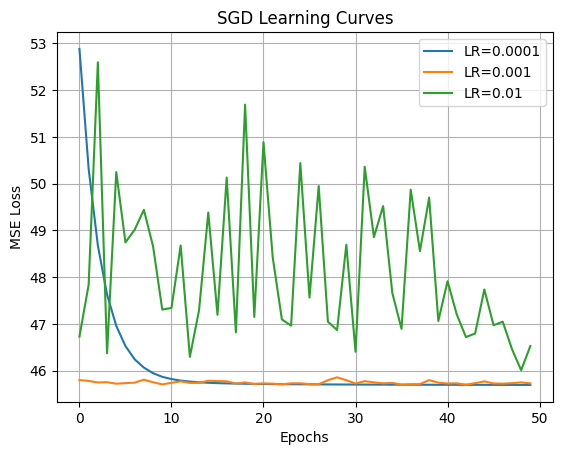

📊 Results Summary (SGD)
    LR  Train MSE  Train RMSE  Train R²  Test MSE  Test RMSE  Test R²
0.0001    45.6965      6.7599   -1.0122   44.4211     6.6649  -2.7421
0.0010    45.7282      6.7623   -1.0136   44.6162     6.6795  -2.7585
0.0100    46.5296      6.8213   -1.0489   43.1058     6.5655  -2.6313


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_array = y_train.values.reshape(-1,1)
y_test_array  = y_test.values.reshape(-1,1)

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, lr=0.01, epochs=50, tol=1e-6):
    n_samples, n_features = X.shape
    theta = np.zeros((n_features,1))
    losses = []

    for epoch in range(epochs):
        # Shuffle data each epoch
        indices = np.arange(n_samples)
        np.random.shuffle(indices)

        for i in indices:
            xi = X[i, :].reshape(1, -1)
            yi = y[i]

            # Prediction
            y_pred = xi.dot(theta)

            # Gradient
            gradient = xi.T.dot(y_pred - yi)

            # Update
            theta -= lr * gradient

        # Track loss after each epoch
        y_pred_full = X.dot(theta)
        loss = mean_squared_error(y, y_pred_full)
        losses.append(loss)

        # Early stopping
        if epoch > 2 and abs(losses[-2] - losses[-1]) < tol:
            print(f"Stopping early at epoch {epoch}")
            break

    return theta, losses

# Try multiple learning rates
learning_rates = [0.0001, 0.001, 0.01]
results = []

for lr in learning_rates:
    theta_sgd, losses_sgd = stochastic_gradient_descent(X_train_scaled, y_train_array, lr=lr, epochs=50)

    # Predictions
    y_train_pred = X_train_scaled.dot(theta_sgd)
    y_test_pred  = X_test_scaled.dot(theta_sgd)

    # Evaluation
    train_mse = mean_squared_error(y_train_array, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train_array, y_train_pred)

    test_mse = mean_squared_error(y_test_array, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test_array, y_test_pred)

    results.append([lr, train_mse, train_rmse, train_r2, test_mse, test_rmse, test_r2])

    # Plot learning curve
    plt.plot(losses_sgd, label=f"LR={lr}")


plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("SGD Learning Curves")
plt.legend()
plt.grid(True)
plt.show()

#  Results Table
import pandas as pd
results_df = pd.DataFrame(results, columns=["LR", "Train MSE", "Train RMSE", "Train R²",
                                            "Test MSE", "Test RMSE", "Test R²"])
print("📊 Results Summary (SGD)")
print(results_df.to_string(index=False, float_format="%.4f"))


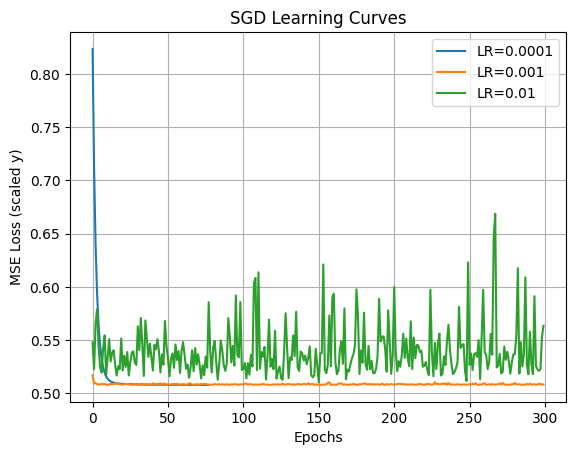

📊 Results Summary (SG)
    LR  Train MSE  Train RMSE  Train R²  Test MSE  Test RMSE  Test R²
0.0001    11.5336      3.3961    0.4921    8.0669     2.8402   0.3204
0.0010    11.5419      3.3973    0.4918    8.0806     2.8426   0.3193
0.0100    12.7956      3.5771    0.4366    9.2034     3.0337   0.2247


In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled  = scaler_y.transform(y_test.values.reshape(-1, 1))


def stochastic_gradient_descent_scaled(X, y_scaled, lr=0.01, epochs=300, tol=1e-6, verbose=False):
    n_samples, n_features = X.shape
    theta = np.zeros((n_features, 1))
    losses = []

    for epoch in range(epochs):
        # Shuffle data each epoch
        indices = np.arange(n_samples)
        np.random.shuffle(indices)

        for i in indices:
            xi = X[i, :].reshape(1, -1)
            yi = y_scaled[i].reshape(1, -1)

            # Prediction
            y_pred = xi.dot(theta)

            # Gradient update
            gradient = xi.T.dot(y_pred - yi)
            theta -= lr * gradient

        # Track full-batch loss
        y_pred_full = X.dot(theta)
        loss = mean_squared_error(y_scaled, y_pred_full)
        losses.append(loss)

        # Early stopping
        if epoch > 5 and abs(losses[-2] - losses[-1]) < tol:
            if verbose:
                print(f"Early stopping at epoch {epoch}, loss={loss:.6f}")
            break

    return theta, losses


learning_rates = [0.0001, 0.001, 0.01]
results = []

for lr in learning_rates:
    theta_sgd, losses_sgd = stochastic_gradient_descent_scaled(
        X_train_scaled, y_train_scaled, lr=lr, epochs=300
    )

    # Predictions (in scaled space → inverse transform back to original y)
    y_train_pred_scaled = X_train_scaled.dot(theta_sgd)
    y_test_pred_scaled  = X_test_scaled.dot(theta_sgd)

    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
    y_test_pred  = scaler_y.inverse_transform(y_test_pred_scaled)

    # Evaluation
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    results.append([lr, train_mse, train_rmse, train_r2, test_mse, test_rmse, test_r2])

    # Plot learning curve
    plt.plot(losses_sgd, label=f"LR={lr}")


plt.xlabel("Epochs")
plt.ylabel("MSE Loss (scaled y)")
plt.title("SGD Learning Curves")
plt.legend()
plt.grid(True)
plt.show()


results_df = pd.DataFrame(results, columns=[
    "LR", "Train MSE", "Train RMSE", "Train R²",
    "Test MSE", "Test RMSE", "Test R²"
])
print("📊 Results Summary (SG)")
print(results_df.to_string(index=False, float_format="%.4f"))


In [102]:
def stochastic_gradient_descent_scaled(X, y_scaled, lr=0.0001, epochs=300, tol=1e-8, verbose=False):
    """
    Implements SGD in scaled space (both X and y are standardized).
    """
    n_samples, n_features = X.shape
    theta = np.zeros((n_features, 1))
    losses = []

    for epoch in range(epochs):
        # Shuffle dataset
        idx = np.random.permutation(n_samples)
        X_shuffled, y_shuffled = X[idx], y_scaled[idx]

        for i in range(n_samples):
            xi = X_shuffled[i].reshape(1, -1)
            yi = y_shuffled[i].reshape(1, -1)

            # Prediction
            y_pred = xi.dot(theta)

            # Gradient update
            gradient = xi.T.dot(y_pred - yi)
            theta -= lr * gradient

        # Compute loss on full dataset
        y_pred_full = X.dot(theta)
        loss = mean_squared_error(y_scaled, y_pred_full)
        losses.append(loss)

        # Early stopping
        if epoch > 20 and abs(losses[-2] - losses[-1]) < tol:
            if verbose:
                print(f"Early stop at epoch {epoch}, loss={losses[-1]:.6f}")
            break

    return theta, losses

theta_sgd, losses_sgd = stochastic_gradient_descent_scaled(
    X_train_scaled, y_train_scaled, lr=0.0001, epochs=300
)

y_train_pred_sgd = scaler_y.inverse_transform(X_train_scaled.dot(theta_sgd))
y_test_pred_sgd  = scaler_y.inverse_transform(X_test_scaled.dot(theta_sgd))

best_sgd = {
    "losses": losses_sgd,
    "y_train_pred": y_train_pred_sgd,
    "y_test_pred": y_test_pred_sgd
}


In [103]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score


y_train_true = y_train.values.reshape(-1,1)
y_test_true  = y_test.values.reshape(-1,1)

# Predictions are already inverse-transformed back to original scale
y_train_pred_sgd = best_sgd["y_train_pred"]
y_test_pred_sgd  = best_sgd["y_test_pred"]

# Training metrics
train_mse = mean_squared_error(y_train_true, y_train_pred_sgd)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_true, y_train_pred_sgd)

# Testing metrics
test_mse = mean_squared_error(y_test_true, y_test_pred_sgd)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_true, y_test_pred_sgd)

# Put into DataFrame for neat output
results_df = pd.DataFrame([{
    "Model": "SGD (scaled y)",
    "LR": 0.0001,
    "Train MSE": train_mse,
    "Train RMSE": train_rmse,
    "Train R²": train_r2,
    "Test MSE": test_mse,
    "Test RMSE": test_rmse,
    "Test R²": test_r2
}])

pd.set_option("display.float_format", lambda x: f"{x:.4f}")
print("\n📊 Results Summary (SGD - scaled y)")
print(results_df.to_string(index=False))



📊 Results Summary (SGD - scaled y)
         Model     LR  Train MSE  Train RMSE  Train R²  Test MSE  Test RMSE  Test R²
SGD (scaled y) 0.0001    11.5327      3.3960    0.4922    8.0686     2.8405   0.3203


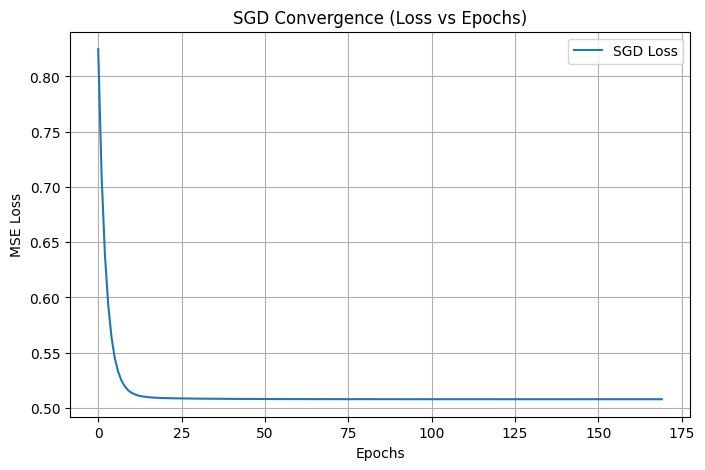

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(losses_sgd, label="SGD Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("SGD Convergence (Loss vs Epochs)")
plt.legend()
plt.grid(True)
plt.show()



📊 MBGD Results (scaled y) summary
    LR  Batch Size  Train MSE  Train RMSE  Train R²  Test MSE  Test RMSE  Test R²
0.0010          32    11.5330      3.3960    0.4922    8.0682     2.8405   0.3203
0.0100          64    11.5328      3.3960    0.4922    8.0699     2.8408   0.3202
0.0100          32    11.5330      3.3960    0.4922    8.0712     2.8410   0.3201
0.0001          32    11.7569      3.4288    0.4823    8.0751     2.8417   0.3197
0.0010          64    11.5375      3.3967    0.4920    8.0752     2.8417   0.3197
0.0001          64    12.9673      3.6010    0.4290    8.4754     2.9113   0.2860


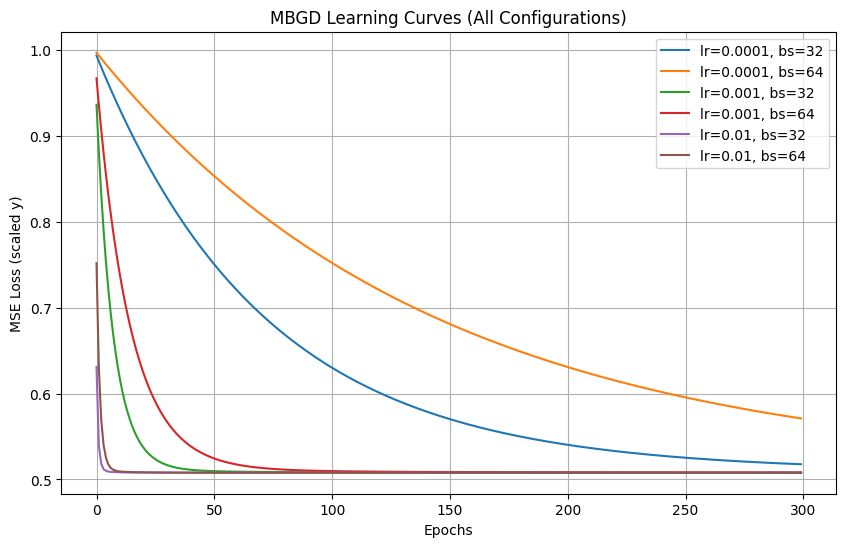

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled  = scaler_y.transform(y_test.values.reshape(-1,1))

# Mini-Batch Gradient Descent Implementation
def mini_batch_gradient_descent_scaled(X, y_scaled, lr=0.001, epochs=300, batch_size=32, tol=1e-8, verbose=False):
    n_samples, n_features = X.shape
    theta = np.zeros((n_features,1))
    losses = []

    for epoch in range(epochs):
        # Shuffle each epoch
        idx = np.random.permutation(n_samples)
        X_shuffled = X[idx]
        y_shuffled = y_scaled[idx]

        # Process mini-batches
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            xb = X_shuffled[start:end]
            yb = y_shuffled[start:end]

            if xb.shape[0] == 0:
                continue

            # Prediction on batch
            y_pred_b = xb.dot(theta)

            # Gradient (in scaled space)
            gradient = (1/xb.shape[0]) * xb.T.dot(y_pred_b - yb)

            # Update
            theta = theta - lr * gradient

        # Compute loss (MSE) on full scaled dataset
        y_pred_full = X.dot(theta)
        loss = mean_squared_error(y_scaled, y_pred_full)
        losses.append(loss)

        # early stopping
        if epoch > 20 and abs(losses[-2] - losses[-1]) < tol:
            if verbose:
                print(f"Early stop at epoch {epoch}, loss={losses[-1]:.6f}")
            break

    return theta, losses


lrs = [0.0001, 0.001, 0.01]
batch_sizes = [32, 64]
max_epochs = 300

results = []
best = None
best_test_r2 = -np.inf

for lr in lrs:
    for bs in batch_sizes:
        theta, losses = mini_batch_gradient_descent_scaled(
            X_train_scaled, y_train_scaled,
            lr=lr, epochs=max_epochs, batch_size=bs, tol=1e-8, verbose=False
        )


        y_train_pred_scaled = X_train_scaled.dot(theta)
        y_test_pred_scaled  = X_test_scaled.dot(theta)

        y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
        y_test_pred  = scaler_y.inverse_transform(y_test_pred_scaled)


        train_mse = mean_squared_error(y_train.values.reshape(-1,1), y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train.values.reshape(-1,1), y_train_pred)

        test_mse = mean_squared_error(y_test.values.reshape(-1,1), y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test.values.reshape(-1,1), y_test_pred)

        results.append({
            "LR": lr,
            "Batch Size": bs,
            "Train MSE": train_mse,
            "Train RMSE": train_rmse,
            "Train R²": train_r2,
            "Test MSE": test_mse,
            "Test RMSE": test_rmse,
            "Test R²": test_r2,
            "LossTrajectory": losses
        })

        if test_r2 > best_test_r2:
            best_test_r2 = test_r2
            best = results[-1]


results_df = pd.DataFrame([{k:v for k,v in r.items() if k!="LossTrajectory"} for r in results])
print("\n📊 MBGD Results (scaled y) summary")
print(results_df.sort_values("Test R²", ascending=False).to_string(index=False))


plt.figure(figsize=(10,6))
for r in results:
    plt.plot(r["LossTrajectory"], label=f"lr={r['LR']}, bs={r['Batch Size']}")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss (scaled y)")
plt.title("MBGD Learning Curves (All Configurations)")
plt.legend()
plt.grid(True)
plt.show()



In [106]:
theta_mbgd, losses_mbgd = mini_batch_gradient_descent_scaled(
    X_train_scaled, y_train_scaled,
    lr=0.01, epochs=300, batch_size=32
)

y_train_pred_mbgd = scaler_y.inverse_transform(X_train_scaled.dot(theta_mbgd))
y_test_pred_mbgd  = scaler_y.inverse_transform(X_test_scaled.dot(theta_mbgd))

best_mbgd = {
    "losses": losses_mbgd,
    "y_train_pred": y_train_pred_mbgd,
    "y_test_pred": y_test_pred_mbgd
}


In [107]:
from sklearn.linear_model import LinearRegression

ols_model = LinearRegression(fit_intercept=False)
ols_model.fit(X_train_scaled, y_train_scaled)

y_train_pred_ols = scaler_y.inverse_transform(ols_model.predict(X_train_scaled))
y_test_pred_ols  = scaler_y.inverse_transform(ols_model.predict(X_test_scaled))

best_ols = {
    "y_train_pred": y_train_pred_ols,
    "y_test_pred": y_test_pred_ols
}


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

results_summary = pd.DataFrame([
    ["SLR",   "-",    "-", *evaluate(y_train, best_ols["y_train_pred"]), *evaluate(y_test, best_ols["y_test_pred"])],
    ["BGD", 0.01,    "-", *evaluate(y_train, best_bgd["y_train_pred"]), *evaluate(y_test, best_bgd["y_test_pred"])],
    ["MBGD",0.01,  32,  *evaluate(y_train, best_mbgd["y_train_pred"]), *evaluate(y_test, best_mbgd["y_test_pred"])],
    ["SGD", 0.0001,  "-", *evaluate(y_train, best_sgd["y_train_pred"]), *evaluate(y_test, best_sgd["y_test_pred"])],
], columns=[
    "Model", "LR", "Batch Size",
    "Train MSE", "Train RMSE", "Train R²",
    "Test MSE", "Test RMSE", "Test R²"
])

print("\n📊 Final Comparison Table:")
print(results_summary.to_string(index=False))





📊 Final Comparison Table:
Model     LR Batch Size  Train MSE  Train RMSE  Train R²  Test MSE  Test RMSE  Test R²
  SLR      -          -    11.5327      3.3960    0.4922    8.0668     2.8402   0.3204
  BGD 0.0100          -    11.5501      3.3985    0.4914    8.0863     2.8436   0.3188
 MBGD 0.0100         32    11.5329      3.3960    0.4922    8.0692     2.8406   0.3202
  SGD 0.0001          -    11.5327      3.3960    0.4922    8.0686     2.8405   0.3203


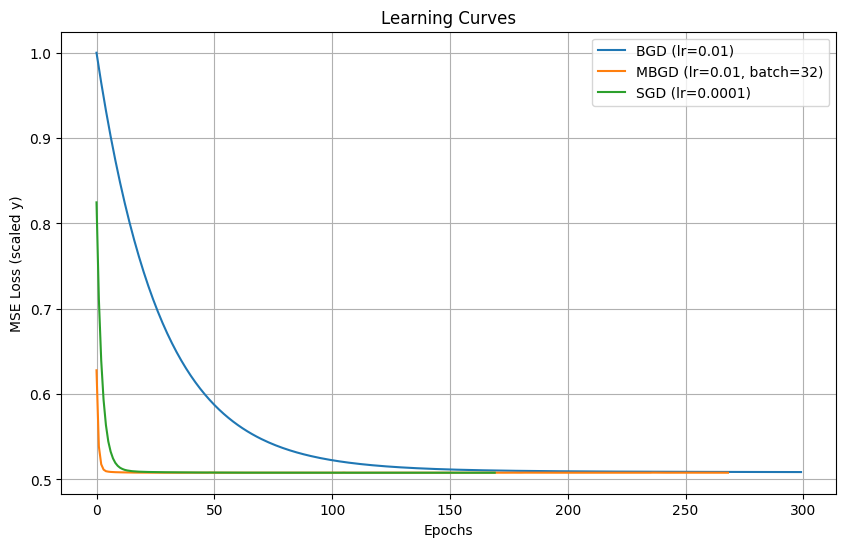

In [109]:

plt.figure(figsize=(10,6))
plt.plot(best_bgd["losses"], label="BGD (lr=0.01)")
plt.plot(best_mbgd["losses"], label="MBGD (lr=0.01, batch=32)")
plt.plot(best_sgd["losses"], label="SGD (lr=0.0001)")
plt.title("Learning Curves")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss (scaled y)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-3171276389.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


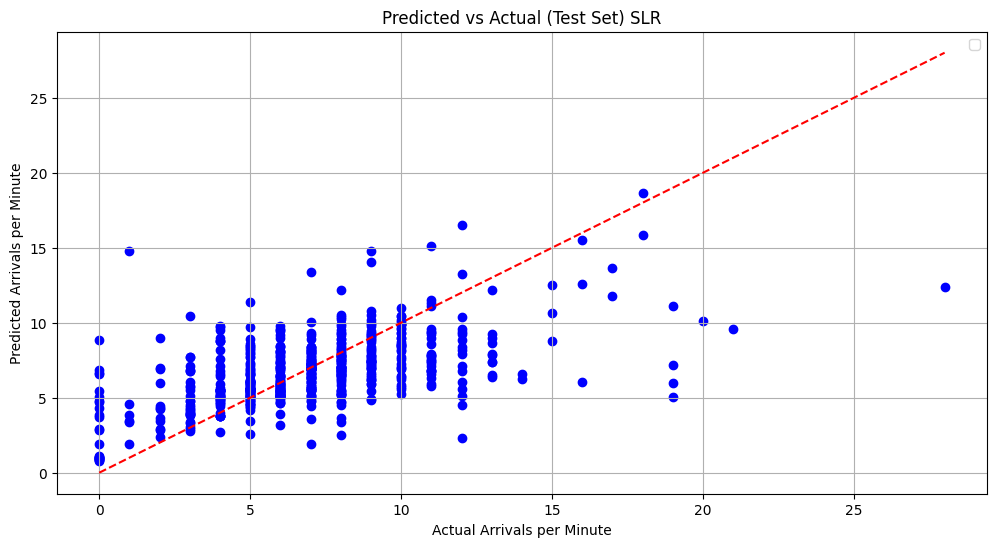

In [110]:
plt.figure(figsize=(12,6))

# Scatter plot: actual vs predicted
plt.scatter(y_test.values, best_ols['y_test_pred'], color='blue')

min_val = min(y_test.values.min(), best_ols['y_test_pred'].min())
max_val = max(y_test.values.max(), best_ols['y_test_pred'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.title("Predicted vs Actual (Test Set) SLR")
plt.xlabel("Actual Arrivals per Minute")
plt.ylabel("Predicted Arrivals per Minute")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-357576888.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


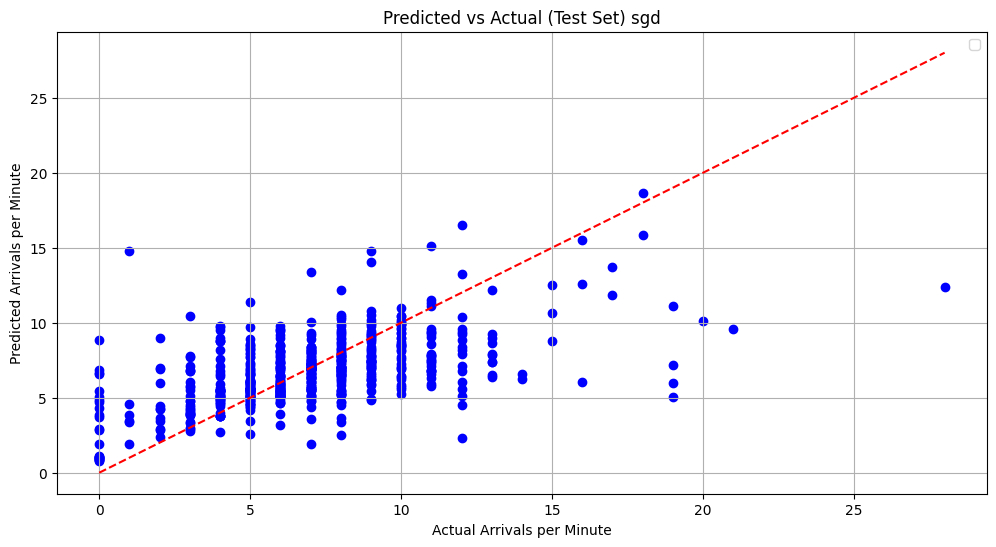

In [111]:
plt.figure(figsize=(12,6))

# Scatter plot: actual vs predicted
plt.scatter(y_test.values, best_sgd['y_test_pred'], color='blue')

min_val = min(y_test.values.min(), best_sgd['y_test_pred'].min())
max_val = max(y_test.values.max(), best_sgd['y_test_pred'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.title("Predicted vs Actual (Test Set) sgd")
plt.xlabel("Actual Arrivals per Minute")
plt.ylabel("Predicted Arrivals per Minute")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-2792809860.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


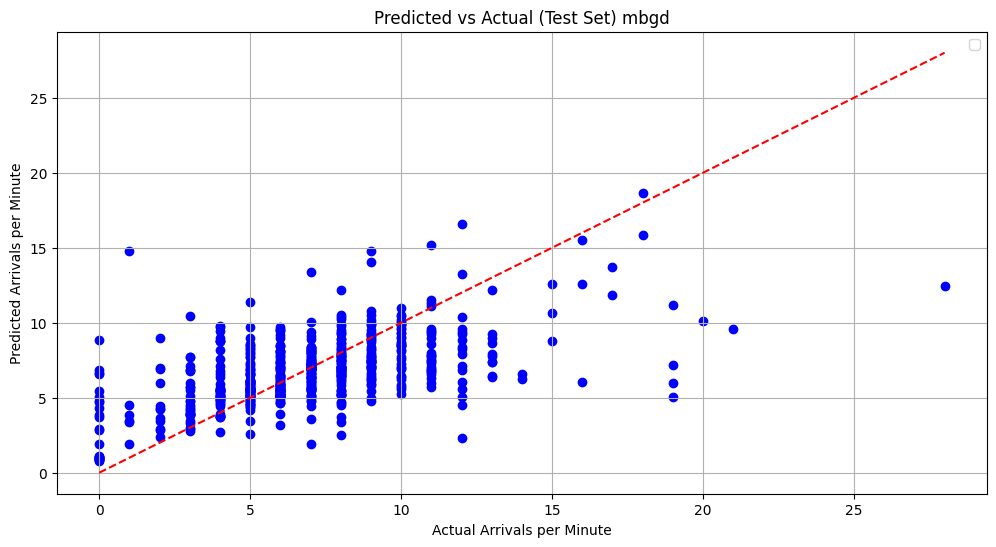

In [112]:
plt.figure(figsize=(12,6))

# Scatter plot: actual vs predicted
plt.scatter(y_test.values, best_mbgd['y_test_pred'], color='blue')

min_val = min(y_test.values.min(), best_mbgd['y_test_pred'].min())
max_val = max(y_test.values.max(), best_mbgd['y_test_pred'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.title("Predicted vs Actual (Test Set) mbgd")
plt.xlabel("Actual Arrivals per Minute")
plt.ylabel("Predicted Arrivals per Minute")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-2924154393.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


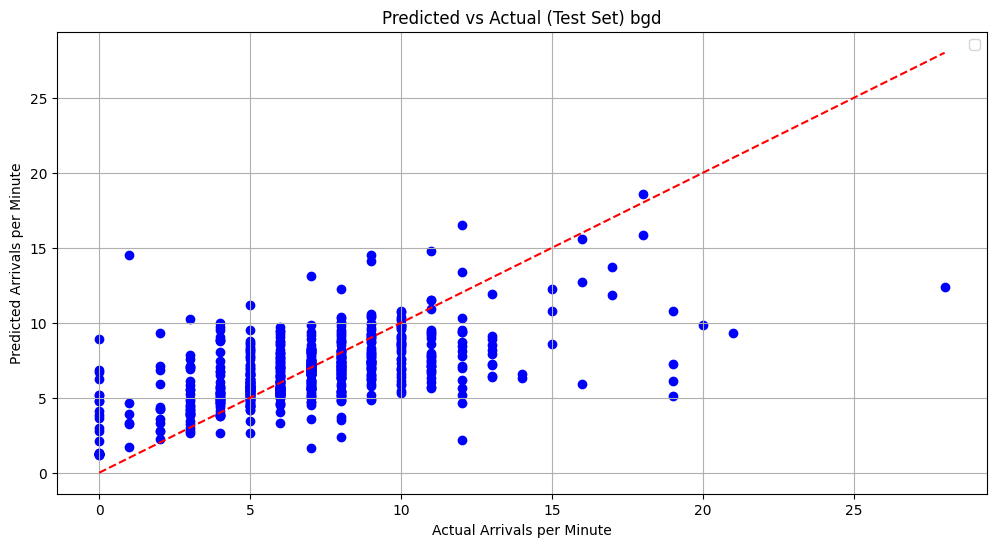

In [113]:
plt.figure(figsize=(12,6))

# Scatter plot: actual vs predicted
plt.scatter(y_test.values, best_bgd['y_test_pred'], color='blue')

min_val = min(y_test.values.min(), best_bgd['y_test_pred'].min())
max_val = max(y_test.values.max(), best_bgd['y_test_pred'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.title("Predicted vs Actual (Test Set) bgd")
plt.xlabel("Actual Arrivals per Minute")
plt.ylabel("Predicted Arrivals per Minute")
plt.legend()
plt.grid(True)
plt.show()

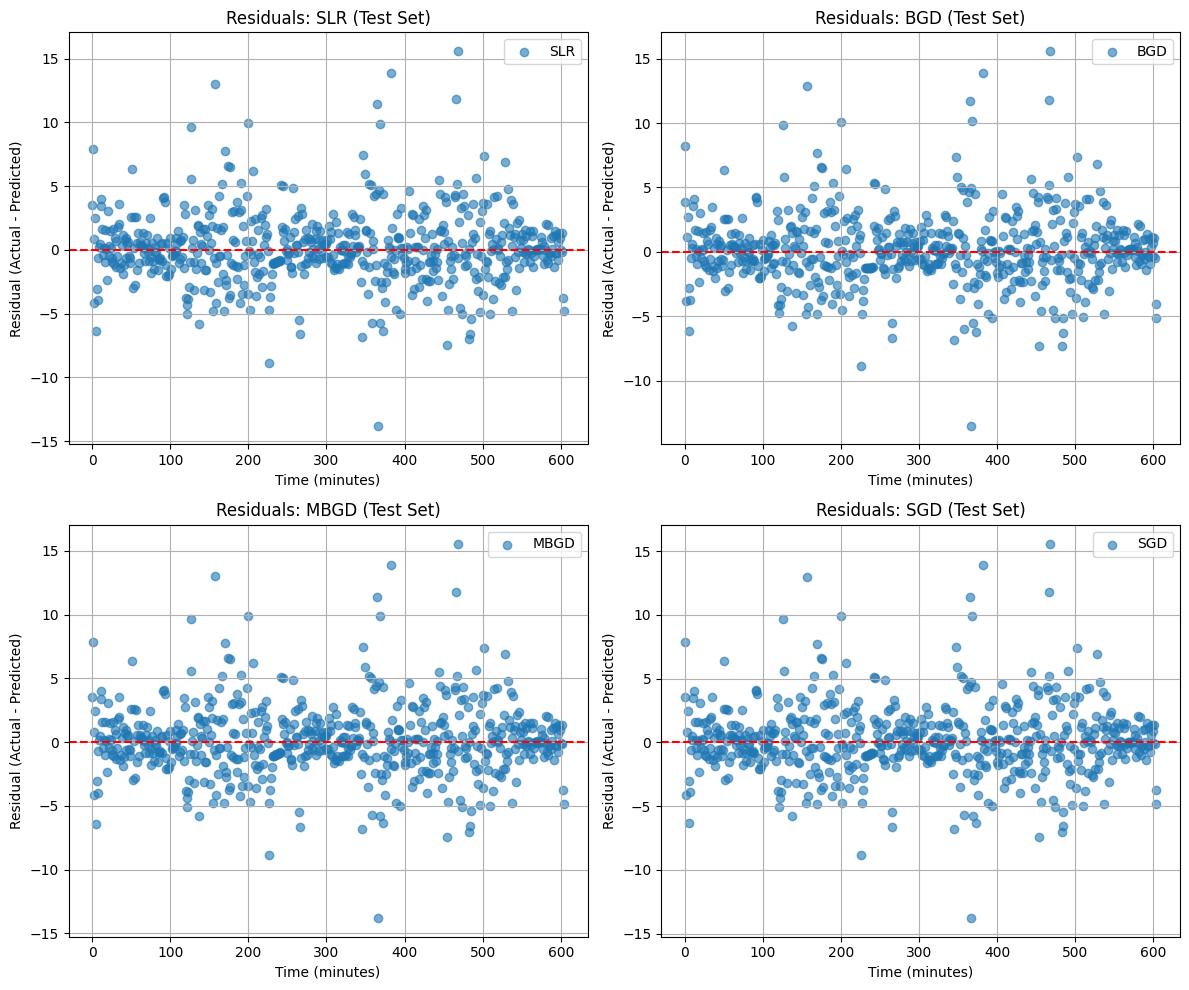

In [114]:
# 3. Residual Plots
def plot_residuals(ax, y_true, y_pred, name):
    residuals = y_true.flatten() - y_pred.flatten()
    ax.scatter(range(len(residuals)), residuals, alpha=0.6, label=name)
    ax.axhline(0, color="red", linestyle="--")
    ax.set_title(f"Residuals: {name} (Test Set)")
    ax.set_xlabel("Time (minutes)")
    ax.set_ylabel("Residual (Actual - Predicted)")
    ax.grid(True)
    ax.legend()


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

plot_residuals(axes[0], y_test.values, best_ols["y_test_pred"], "SLR")
plot_residuals(axes[1], y_test.values, best_bgd["y_test_pred"], "BGD")
plot_residuals(axes[2], y_test.values, best_mbgd["y_test_pred"], "MBGD")
plot_residuals(axes[3], y_test.values, best_sgd["y_test_pred"], "SGD")


plt.tight_layout()
plt.show()

Operational Insights

In [115]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

#Parameters
block_size = 5   # 5-minute blocks
capacity = 18    # FUTA shuttle seats
start_time = "08:00:00"
n_bootstrap = 1000

# Compute residuals
residuals = y_test.values - y_test_pred_mbgd.flatten()

# Bootstrap-based operational insights
def bootstrap_operational_table(y_true, y_pred, block_size=5, start_time="08:00:00"):
    blocks = []
    start_dt = datetime.strptime(start_time, "%H:%M:%S")

    for start in range(0, len(y_true), block_size):
        end = min(start + block_size, len(y_true))

        true_block = y_true[start:end].sum()
        pred_block = y_pred[start:end].sum()

        # Bootstrap simulation
        boot_preds = []
        for _ in range(n_bootstrap):
            sampled_resid = np.random.choice(residuals, size=(end-start,), replace=True)
            boot_sample = y_pred[start:end] + sampled_resid
            boot_preds.append(boot_sample.sum())
        boot_preds = np.array(boot_preds)

        # 95% CI
        ci_low, ci_high = np.percentile(boot_preds, [2.5, 97.5])

        # Probability exceedance
        exceed_prob = np.mean(boot_preds > capacity)

        # Recommendation
        if exceed_prob > 0.5:
            rec = "Standby 2nd shuttle"
        else:
            rec = "One shuttle OK"

        # Time label
        block_start = start_dt + timedelta(minutes=start)
        block_end   = start_dt + timedelta(minutes=end)
        time_label = f"{block_start.strftime('%H:%M')}–{block_end.strftime('%H:%M')}"

        blocks.append({
            "Time Range": time_label,
            "Predicted (5 min)": round(pred_block, 1),
            "Actual": int(true_block),
            "95% CI (Low–High)": f"{ci_low:.1f} – {ci_high:.1f}",
            "P(>18)": round(exceed_prob, 3),
            "Recommendation": rec
        })

    return pd.DataFrame(blocks)

# Run for MBGD test set
operational_table = bootstrap_operational_table(
    y_test.values, y_test_pred_mbgd.flatten(),
    block_size=5, start_time="08:00:00"
)

print("\n📊 Operational Insights (first few blocks):")
print(operational_table.tail(10).to_string(index=False))



📊 Operational Insights (first few blocks):
 Time Range  Predicted (5 min)  Actual 95% CI (Low–High)  P(>18)      Recommendation
17:15–17:20            35.3000      36       23.7 – 50.4  0.9950 Standby 2nd shuttle
17:20–17:25            34.8000      35       24.0 – 49.6  0.9980 Standby 2nd shuttle
17:25–17:30            34.9000      36       23.5 – 51.5  0.9930 Standby 2nd shuttle
17:30–17:35            34.8000      35       23.8 – 48.3  0.9980 Standby 2nd shuttle
17:35–17:40            35.7000      36       24.1 – 50.9  0.9990 Standby 2nd shuttle
17:40–17:45            36.8000      39       26.3 – 50.6  1.0000 Standby 2nd shuttle
17:45–17:50            36.0000      36       25.2 – 51.8  0.9980 Standby 2nd shuttle
17:50–17:55            34.9000      37       24.4 – 49.5  0.9980 Standby 2nd shuttle
17:55–18:00            34.2000      36       23.1 – 49.7  0.9970 Standby 2nd shuttle
18:00–18:05            32.4000      25       21.9 – 47.3  0.9940 Standby 2nd shuttle


In [116]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Estimate λ(t) from training data
lambda_hat = train_df.groupby("t")["y (target)"].mean()

# Predict for test data
# Align minutes in test set with lambda_hat
y_test_pred_nhpp = test_df["t"].map(lambda_hat).fillna(0).values
y_test_true = test_df["y (target)"].values

# Evaluate
mse = mean_squared_error(y_test_true, y_test_pred_nhpp)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_true, y_test_pred_nhpp)

print("📊 NHPP Results")
print("MSE: ", mse)
print("RMSE:", rmse)
print("R²:  ", r2)



📊 NHPP Results
MSE:  13.491239669421487
RMSE: 3.6730422907205256
R²:   -0.13651252271008474


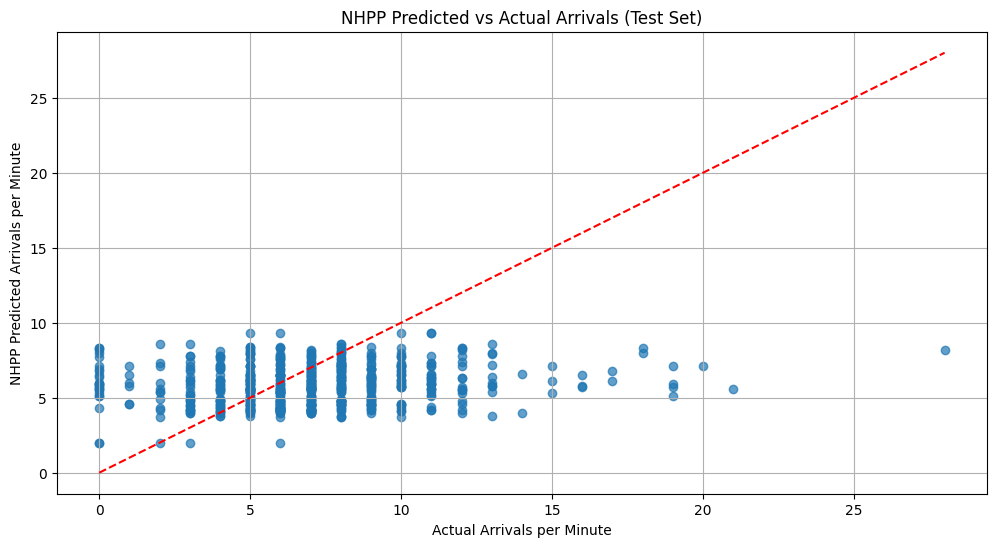

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(y_test_true, y_test_pred_nhpp, alpha=0.7)
plt.xlabel("Actual Arrivals per Minute")
plt.ylabel("NHPP Predicted Arrivals per Minute")
plt.title("NHPP Predicted vs Actual Arrivals (Test Set)")
plt.grid(True)


min_val = min(y_test_true.min(), y_test_pred_nhpp.min())
max_val = max(y_test_true.max(), y_test_pred_nhpp.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.show()

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

#  NHPP Implementation
# Estimate λ(t) from training data
lambda_hat = train_df.groupby("t")["y (target)"].mean()

# Predict on test data
y_test_pred_nhpp = test_df["t"].map(lambda_hat).fillna(0).values
y_test_true = test_df["y (target)"].values

# Evaluate NHPP
nhpp_mse = mean_squared_error(y_test_true, y_test_pred_nhpp)
nhpp_rmse = np.sqrt(nhpp_mse)
nhpp_r2 = r2_score(y_test_true, y_test_pred_nhpp)

print("📊 NHPP Results")
print(f"MSE:  {nhpp_mse:.4f}")
print(f"RMSE: {nhpp_rmse:.4f}")
print(f"R²:   {nhpp_r2:.4f}")

results_summary = pd.DataFrame([
    ["SLR",   "-",    "-", *evaluate(y_train, best_ols["y_train_pred"]), *evaluate(y_test, best_ols["y_test_pred"])],
    ["BGD", 0.01,    "-", *evaluate(y_train, best_bgd["y_train_pred"]), *evaluate(y_test, best_bgd["y_test_pred"])],
    ["MBGD",0.01,  32,  *evaluate(y_train, best_mbgd["y_train_pred"]), *evaluate(y_test, best_mbgd["y_test_pred"])],
    ["SGD", 0.0001,  "-", *evaluate(y_train, best_sgd["y_train_pred"]), *evaluate(y_test, best_sgd["y_test_pred"])],
    ["NHPP",      "-",      "-",     np.nan,   np.nan,   np.nan, nhpp_mse, nhpp_rmse, nhpp_r2]
], columns=[
    "Model", "LR", "Batch Size",
    "Train MSE", "Train RMSE", "Train R²",
    "Test MSE", "Test RMSE", "Test R²"
])


print("\n📊 Final Comparison Table (with NHPP):")
print(results_summary.to_string(index=False))




📊 NHPP Results
MSE:  13.4912
RMSE: 3.6730
R²:   -0.1365

📊 Final Comparison Table (with NHPP):
Model     LR Batch Size  Train MSE  Train RMSE  Train R²  Test MSE  Test RMSE  Test R²
  SLR      -          -    11.5327      3.3960    0.4922    8.0668     2.8402   0.3204
  BGD 0.0100          -    11.5501      3.3985    0.4914    8.0863     2.8436   0.3188
 MBGD 0.0100         32    11.5329      3.3960    0.4922    8.0692     2.8406   0.3202
  SGD 0.0001          -    11.5327      3.3960    0.4922    8.0686     2.8405   0.3203
 NHPP      -          -        NaN         NaN       NaN   13.4912     3.6730  -0.1365
